In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [30]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#GPU memory limiting

In [31]:
#copied_path='/content/drive/My Drive/9z_ML_Bootcamp/Kannada_MINST/train.csv'
data=pd.read_csv('train.csv')


In [32]:
X_train= data.values[:6000, 1:]
y_train=data.values[:6000, 0]
n_classes=10
y_train = to_categorical(y_train, n_classes)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train.shape

(4800, 28, 28, 1)

# Data augmentation


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation

datagen = ImageDataGenerator(zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rotation_range=10)
datagen.fit(X_train)

In [14]:
train_generator=datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_generator=datagen.flow(X_test,y_test, batch_size=64, shuffle=True)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


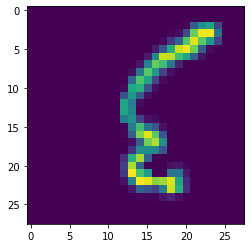

In [16]:
i=0
batch_size=10
for img_batch in train_generator:
        x,y=img_batch
        plt.imshow(x[2])
        print(y[2])
        i=i+1    
        if i >= batch_size:
            break

In [18]:
x.shape
y.shape

(32, 10)

# AlexNet

In [33]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(11,11), activation='relu', padding='same', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(3,3))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [27]:
alex=model.fit_generator(train_generator, steps_per_epoch = 150,epochs=3,
                         validation_data=val_generator, validation_steps=10,shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 150 steps, validate for 10 steps
Epoch 1/30
150/150 [==============================] - 9s 59ms/step - loss: 2.2651 - accuracy: 0.1744 - val_loss: 2.1436 - val_accuracy: 0.3109
Epoch 2/30
150/150 [==============================] - 3s 22ms/step - loss: 1.5828 - accuracy: 0.5027 - val_loss: 1.0636 - val_accuracy: 0.6047
Epoch 3/30
 27/150 [====>.........................] - ETA: 3s - loss: 0.8063 - accuracy: 0.7060

KeyboardInterrupt: 

In [35]:
AlexNet=model.fit(x=X_train, y=y_train,epochs=3,batch_size=128, validation_data=(X_test,y_test), shuffle=True)


Train on 4800 samples, validate on 1200 samples
Epoch 1/3
4800/4800 [==============================] - 3s 696us/sample - loss: 2.2972 - accuracy: 0.1225 - val_loss: 2.2777 - val_accuracy: 0.1242
Epoch 2/3
4800/4800 [==============================] - 2s 326us/sample - loss: 2.2773 - accuracy: 0.1935 - val_loss: 2.2444 - val_accuracy: 0.3983
Epoch 3/3
4800/4800 [==============================] - 2s 326us/sample - loss: 2.2413 - accuracy: 0.3067 - val_loss: 2.1689 - val_accuracy: 0.5308


In [ ]:
loss = AlexNet.history['loss']
val_loss = AlexNet.history['val_loss']

len(loss)

train_epoch=range(1,31)
plt.plot(train_epoch,loss, label='loss')
plt.plot(train_epoch,val_loss, label='validation_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
accuracy  = AlexNet.history['accuracy']
val_accuracy = AlexNet.history['val_accuracy']



train_epoch=range(1,31)
plt.plot(train_epoch,accuracy , label='accuracy')
plt.plot(train_epoch,val_accuracy , label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

text=('best accuracy' ,max(val_accuracy),)

plt.text(1,0.9940,text,fontsize =12)


# VGG16

In [ ]:
model2 = Sequential()

model2.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())


model2.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.summary()

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())

model2.summary()
 
    #Should duplicate 3 times, but only 2. max pooling make it negative dimensions. 







model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
VGG=model2.fit(x=X_train, y=y_train,epochs=30,batch_size=128, validation_data=(X_test,y_test), shuffle=True)


In [ ]:
accuracy  = VGG.history['accuracy']
val_accuracy = VGG.history['val_accuracy']



train_epoch=range(1,31)
plt.plot(train_epoch,accuracy , label='accuracy')
plt.plot(train_epoch,val_accuracy , label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

text=('VGG best accuracy' ,max(val_accuracy),)

plt.text(1,0.9940,text,fontsize =12)

# self build CNN